In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
moran_df = pd.read_csv('data/All_MoranI_combined.csv')
pathway_df = pd.read_csv('Task_Info_with_CRC_binary.csv')
moran_df = moran_df.merge(pathway_df[['Task', 'Subsystem']], on='Task', how='left')
moran_df.rename(columns={'Subsystem': 'Pathway'}, inplace=True)
moran_df

,Task,I,pval_norm,var_norm,pval_norm_fdr_bh,Subject_ID,Treatment_Status,Optimal_k,I_z,Pathway
0,Vesicle secretion,0.124935,1.749904e-08,0.000529,8.749521e-07,1182412B,Treated,6,3.037548,Vesicle secretion
1,Trafficking to endosomes (Clathrin Vesicles),0.124935,1.749904e-08,0.000529,8.749521e-07,1182412B,Treated,6,3.037548,Endosomal trafficking
2,Elaidate degradation,0.088321,4.391588e-05,0.000529,5.953001e-04,1182412B,Treated,6,1.669880,FATTY ACID METABOLISM
3,Palmitate degradation,0.088321,4.391588e-05,0.000529,5.953001e-04,1182412B,Treated,6,1.669880,FATTY ACID METABOLISM
4,Linolenate degradation,0.087585,5.012796e-05,0.000529,5.953001e-04,1182412B,Treated,6,1.642407,FATTY ACID METABOLISM
...,...,...,...,...,...,...,...,...,...,...
2194,Synthesis of estradiol-17beta (E2) from andros...,0.024255,2.028072e-03,0.000073,2.112575e-03,120161,Untreated,6,-1.635369,ESTROGEN METABOLISM
2195,Synthesis of estrone (E1) from androstenedione,0.014400,4.290782e-02,0.000073,4.423486e-02,120161,Untreated,6,-1.683341,ESTROGEN METABOLISM
2196,Keratan sulfate biosynthesis from O-glycan (co...,0.005509,2.497815e-01,0.000073,2.497815e-01,120161,Untreated,6,-1.726617,KERATAN SULFATE METABOLISM
2197,Keratan sulfate biosynthesis from O-glycan (co...,0.005509,2.497815e-01,0.000073,2.497815e-01,120161,Untreated,6,-1.726617,KERATAN SULFATE METABOLISM


In [4]:
moran_df.columns

Index(['Task', 'I', 'pval_norm', 'var_norm', 'pval_norm_fdr_bh', 'Subject_ID',
       'Treatment_Status', 'Optimal_k', 'I_z', 'Pathway'],
      dtype='object')

In [5]:
# Noramlize Moran's I to get I_z
moran_df["I_z"] = moran_df.groupby("Subject_ID")["I"].transform(
    lambda x: (x - x.mean()) / x.std(ddof=0)
)

### Mean Moran's I Normalized Analysis

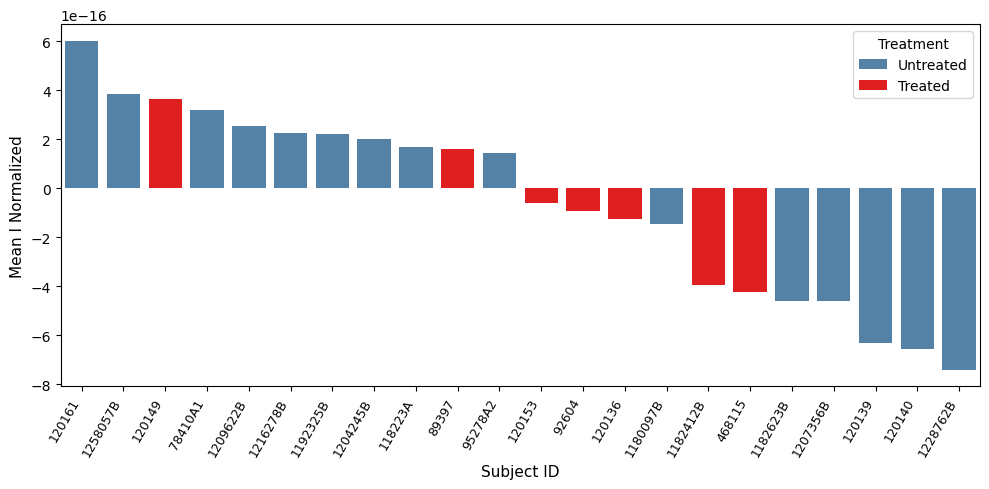

In [6]:
df_subject = (
    moran_df.groupby(["Subject_ID", "Treatment_Status"])["I_z"]
    .mean()
    .reset_index()
)

order = (
    df_subject.groupby("Subject_ID")["I_z"]
    .mean()
    .sort_values(ascending=False)
    .index
)

plt.figure(figsize=(10, 5))
sns.barplot(
    x="Subject_ID",
    y="I_z",
    hue="Treatment_Status",
    data=df_subject,
    order=order,
    palette={"Treated": "red", "Untreated": "steelblue"}
)

plt.xticks(rotation=60, ha="right", fontsize=9)
plt.ylabel("Mean I Normalized", fontsize=11)
plt.xlabel("Subject ID", fontsize=11)
# plt.title("Average Moran’s I per Subject (Treated vs Untreated)", fontsize=13, pad=10)
plt.legend(title="Treatment", loc="upper right")
plt.tight_layout()
plt.show()

In [7]:
top_moran = moran_df[moran_df['I'].abs() >= 0.5].dropna().sort_values(by='I', ascending=False)
top_moran

,Task,I,pval_norm,var_norm,pval_norm_fdr_bh,Subject_ID,Treatment_Status,Optimal_k,I_z,Pathway
2099,Elaidate synthesis,0.658385,0.0,0.000073,0.0,120161,Untreated,6,1.451389,FATTY ACID METABOLISM
2100,Palmitate synthesis,0.658385,0.0,0.000073,0.0,120161,Untreated,6,1.451389,FATTY ACID METABOLISM
2101,cis-vaccenic acid synthesis,0.658385,0.0,0.000073,0.0,120161,Untreated,6,1.451389,FATTY ACID METABOLISM
2102,ATP regeneration from glucose (normoxic condit...,0.653981,0.0,0.000073,0.0,120161,Untreated,6,1.429951,ATP GENERATION
2104,Taurochenodeoxycholate synthesis,0.643006,0.0,0.000073,0.0,120161,Untreated,6,1.376528,BILE ACID SYNTHESIS
...,...,...,...,...,...,...,...,...,...,...
2005,Glucose to lactate conversion,0.501763,0.0,0.000023,0.0,1192325B,Untreated,6,1.432215,PYRUVATE METABOLISM
2004,Gluconeogenesis from Lactate,0.501763,0.0,0.000023,0.0,1192325B,Untreated,6,1.432215,GLUCONEOGENESIS
1501,Synthesis of L-kynurenine from tryptophan,0.501574,0.0,0.000031,0.0,92604,Treated,7,2.956172,TRYPTOPHAN METABOLISM
1500,Synthesis of kynate from tryptophan,0.501574,0.0,0.000031,0.0,92604,Treated,7,2.956172,TRYPTOPHAN METABOLISM


In [20]:
task_stats = (
    moran_df.groupby(["Pathway", "Treatment_Status"])["I_z"]
    .mean()
    .reset_index()
    .pivot(index="Pathway", columns="Treatment_Status", values="I_z")
)

task_stats["Delta_Iz"] = task_stats["Treated"] - task_stats["Untreated"]

task_stats = task_stats.dropna(subset=["Treated", "Untreated"])

task_stats = task_stats.sort_values("Delta_Iz", ascending=False)

top_treated = task_stats.head(10)
top_untreated = task_stats.tail(10)

print("🔥 Top 10 Tasks with Higher Moran’s I in Treated:")
print(top_treated[["Treated", "Untreated", "Delta_Iz"]])

print("\n❄️ Top 10 Tasks with Higher Moran’s I in Untreated:")
print(top_untreated[["Treated", "Untreated", "Delta_Iz"]])


🔥 Top 10 Tasks with Higher Moran’s I in Treated:
Treatment_Status        Treated  Untreated  Delta_Iz
Pathway                                             
Endosomal trafficking  0.715793  -0.272921  0.988714
Vesicle secretion      0.715793  -0.272921  0.988714
ANDROGEN METABOLISM   -0.339788  -1.068807  0.729019
ESTROGEN METABOLISM   -0.562850  -1.055757  0.492907
ASPARAGINE METABOLISM  0.313372  -0.012623  0.325994
GLOBOSIDE METABOLISM   0.053946  -0.239888  0.293834
BILE ACID SYNTHESIS    1.520559   1.279803  0.240756
GLUTAMATE METABOLISM   0.376655   0.146985  0.229670
VALINE METABOLISM      0.232477   0.017844  0.214633
ISOLEUCINE METABOLISM  0.232477   0.017844  0.214633

❄️ Top 10 Tasks with Higher Moran’s I in Untreated:
Treatment_Status              Treated  Untreated  Delta_Iz
Pathway                                                   
GLUCONEOGENESIS              0.155686   0.468728 -0.313043
ATP GENERATION               0.759007   1.125332 -0.366325
BETA-ALANINE METABOLISM   

/tmp/ipykernel_567328/1476622489.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


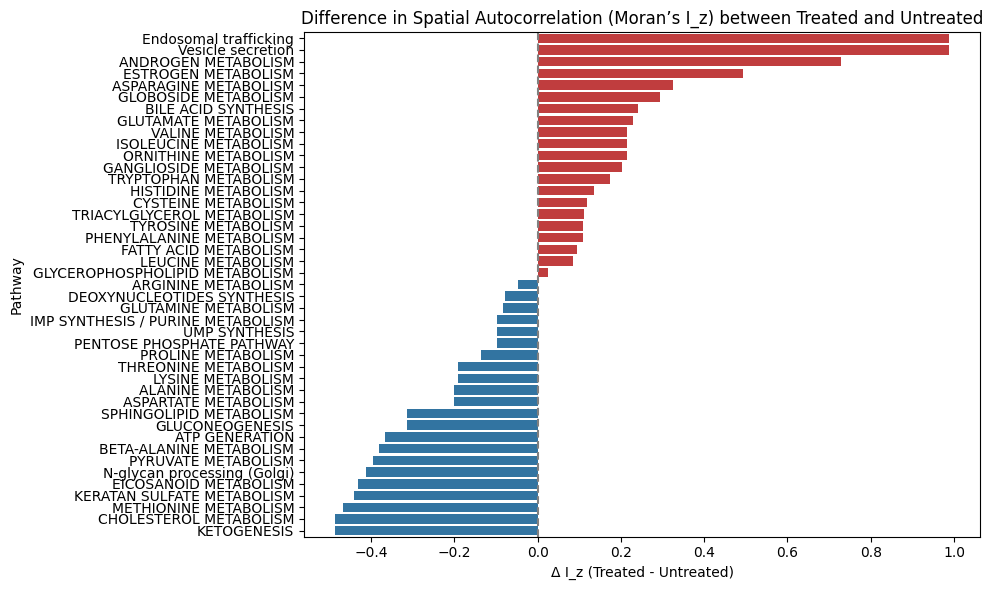

In [21]:
plt.figure(figsize=(10, 6))
sns.barplot(
    x="Delta_Iz", 
    y=task_stats.index, 
    data=task_stats, 
    palette=["#d62728" if x > 0 else "#1f77b4" for x in task_stats["Delta_Iz"]]
)
plt.axvline(0, color="gray", linestyle="--")
plt.xlabel("Δ I_z (Treated - Untreated)")
plt.ylabel("Pathway")
plt.title("Difference in Spatial Autocorrelation (Moran’s I_z) between Treated and Untreated")
plt.tight_layout()
plt.show()


### LogFC Analysis

In [25]:
# Calculate log-fold change instead of raw difference
moran_df["I_abs"] = moran_df["I_z"].abs()

task_stats = (
    moran_df.groupby(["Pathway", "Treatment_Status"])["I_abs"]
    .mean()
    .reset_index()
    .pivot(index="Pathway", columns="Treatment_Status", values="I_abs")
)

# Avoid issues with zero or negative values by adding a small constant
eps = 1e-6
task_stats["logFC"] = np.log2((task_stats["Treated"] + eps) / (task_stats["Untreated"] + eps))

task_stats = task_stats.dropna(subset=["Treated", "Untreated"])

task_stats = task_stats.sort_values("logFC", ascending=False)

top_treated = task_stats.head(10)
top_untreated = task_stats.tail(10)

print("Top 10 Tasks with Higher log-FC in Treated:")
print(top_treated[["Treated", "Untreated", "logFC"]])

print("\nTop 10 Tasks with Higher log-FC in Untreated:")
print(top_untreated[["Treated", "Untreated", "logFC"]])


Top 10 Tasks with Higher log-FC in Treated:
Treatment_Status                    Treated  Untreated     logFC
Pathway                                                         
Endosomal trafficking              0.819296   0.622301  0.396772
Vesicle secretion                  0.819296   0.622301  0.396772
LYSINE METABOLISM                  0.459295   0.358699  0.356647
THREONINE METABOLISM               0.459295   0.358699  0.356647
N-glycan processing (Golgi)        0.916018   0.746066  0.296072
ANDROGEN METABOLISM                1.405967   1.169459  0.265722
GLUTAMINE METABOLISM               0.647518   0.558127  0.214325
BILE ACID SYNTHESIS                1.520559   1.333738  0.189126
FATTY ACID METABOLISM              0.948878   0.873140  0.120009
IMP SYNTHESIS / PURINE METABOLISM  1.455561   1.358705  0.099343

Top 10 Tasks with Higher log-FC in Untreated:
Treatment_Status          Treated  Untreated     logFC
Pathway                                               
VALINE METABOLISM  

/tmp/ipykernel_567328/3744384356.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


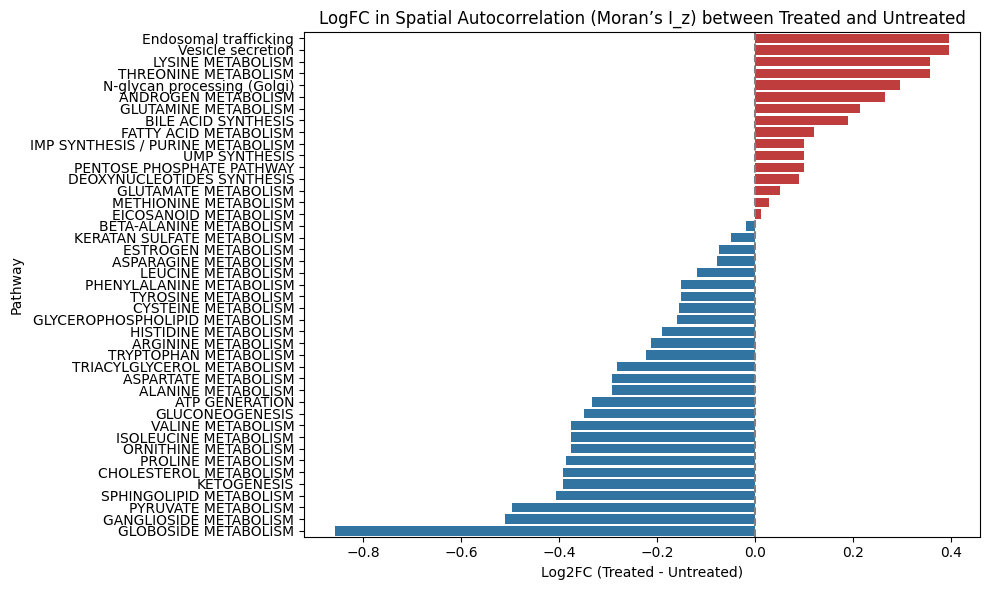

In [26]:
plt.figure(figsize=(10, 6))
sns.barplot(
    x="logFC", 
    y=task_stats.index, 
    data=task_stats, 
    palette=["#d62728" if x > 0 else "#1f77b4" for x in task_stats["logFC"]]
)
plt.axvline(0, color="gray", linestyle="--")
plt.xlabel("Log2FC (Treated - Untreated)")
plt.ylabel("Pathway")
plt.title("LogFC in Spatial Autocorrelation (Moran’s I_z) between Treated and Untreated")
plt.tight_layout()
plt.show()


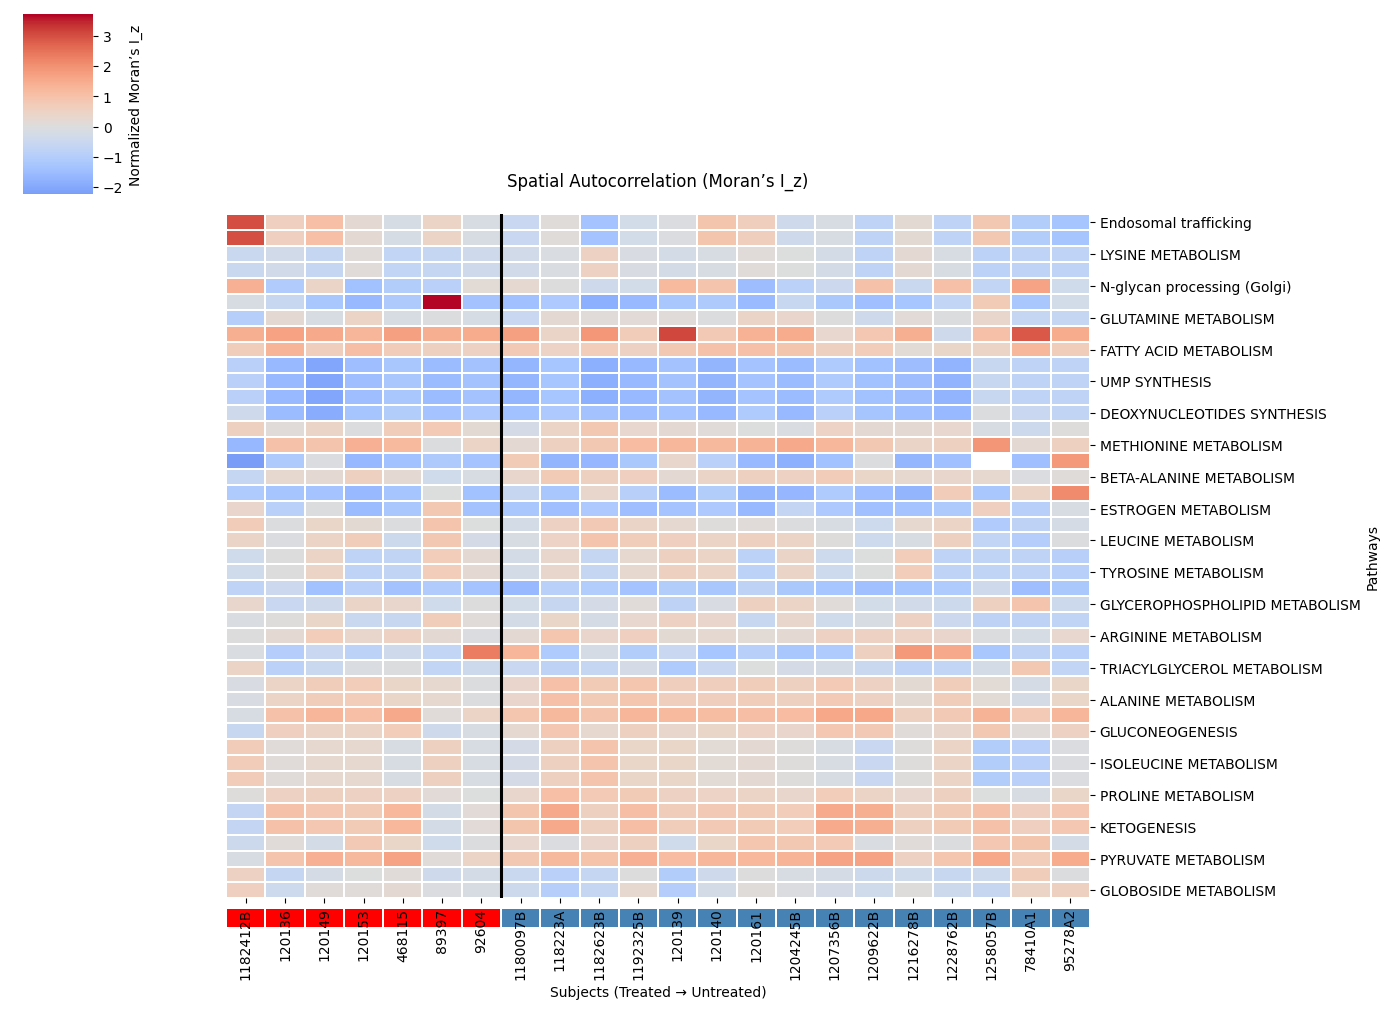

In [27]:
heat_df = (
    moran_df.groupby(["Pathway", "Subject_ID", "Treatment_Status"])["I_z"]
    .mean()
    .reset_index()
)

heat_pivot = heat_df.pivot_table(
    index="Pathway",
    columns=["Treatment_Status", "Subject_ID"],
    values="I_z"
)

ordered_pathways = task_stats.sort_values("logFC", ascending=False).index
heat_pivot = heat_pivot.loc[ordered_pathways]

treated_cols = [col for col in heat_pivot.columns if col[0] == "Treated"]
untreated_cols = [col for col in heat_pivot.columns if col[0] == "Untreated"]
heat_pivot = pd.concat([heat_pivot[treated_cols], heat_pivot[untreated_cols]], axis=1)

treatment_labels = ["Treated"] * len(treated_cols) + ["Untreated"] * len(untreated_cols)
palette = {"Treated": "red", "Untreated": "steelblue"}
col_colors = pd.Series(treatment_labels, index=heat_pivot.columns).map(palette)

new_labels = [col[1] for col in list(heat_pivot.columns)]
heat_pivot.columns = new_labels

g = sns.clustermap(
    heat_pivot,
    cmap="coolwarm",
    center=0,
    col_colors=[col_colors],
    col_cluster=False,
    row_cluster=False,
    linewidths=0.3,
    figsize=(14, 10),
    cbar_kws={"label": "Normalized Moran’s I_z"},
)

col_colors_ax = g.ax_col_colors
heatmap_ax = g.ax_heatmap
col_colors_ax.set_position([
    heatmap_ax.get_position().x0,
    heatmap_ax.get_position().y0 - 0.03,
    heatmap_ax.get_position().width,
    0.02
])

treated_count = len(treated_cols)
g.ax_heatmap.axvline(
    treated_count,
    color="black",
    lw=2.2,
    linestyle="-"
)

if g.ax_col_dendrogram.get_legend():
    g.ax_col_dendrogram.get_legend().remove()

g.ax_heatmap.set_xlabel("Subjects (Treated → Untreated)")
g.ax_heatmap.set_ylabel("Pathways")
g.ax_heatmap.set_title("Spatial Autocorrelation (Moran’s I_z)", pad=20)

plt.show()


/home/sadegh/python_projects/nanostring-cosmx-spatial-omics-modeling/venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


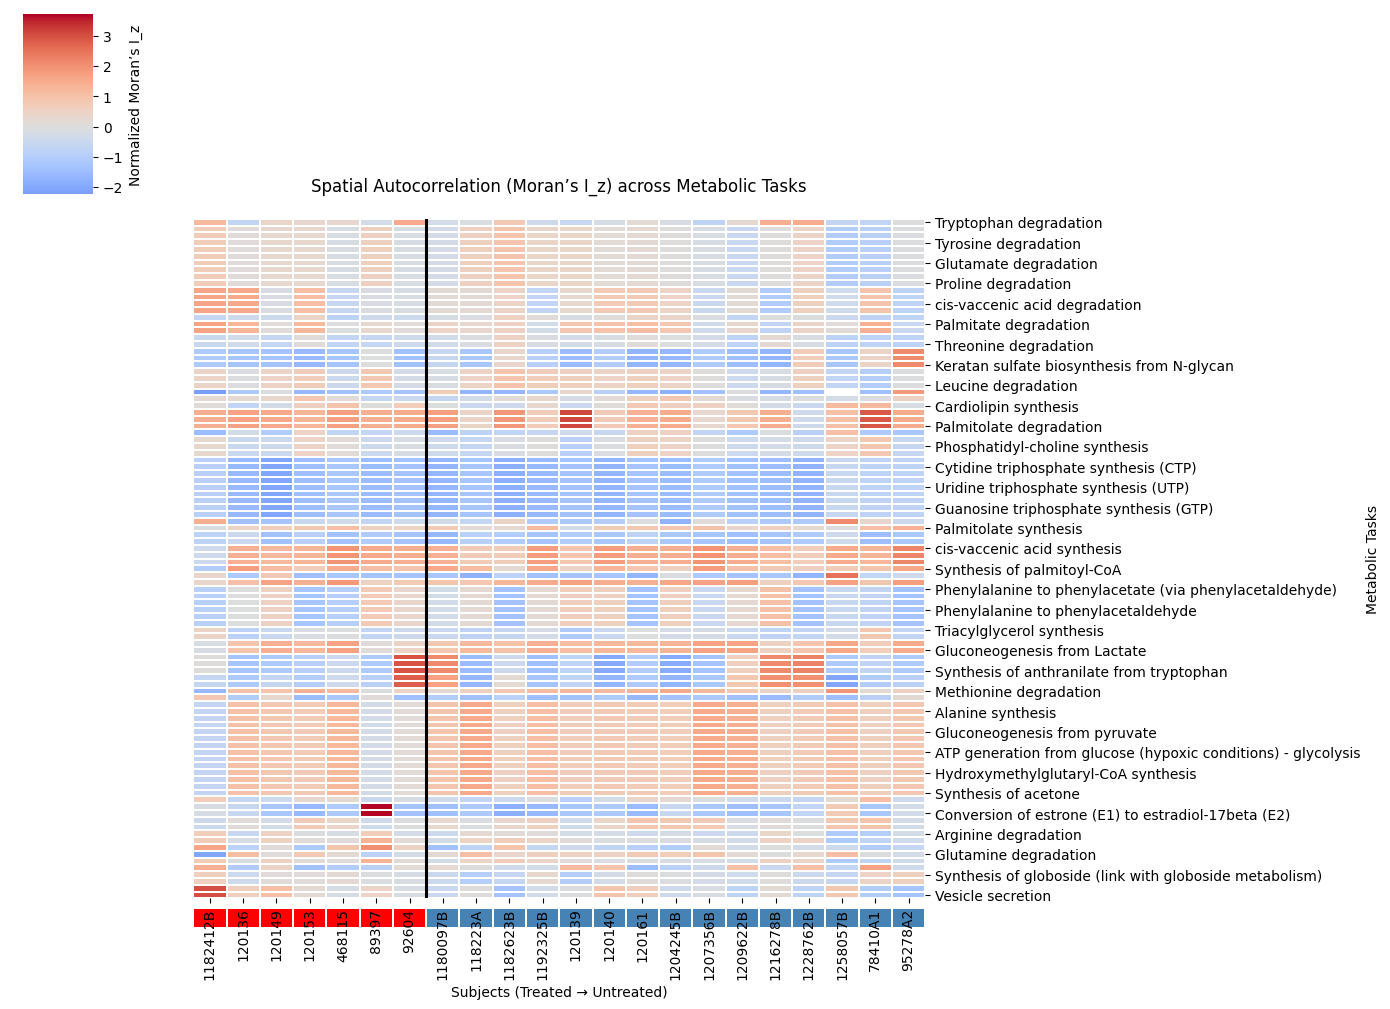

In [30]:
# Step 1: compute mean I_z per task per treatment
task_order = (
    heat_df.groupby(["Task", "Treatment_Status"])["I_z"]
    .mean()
    .unstack()
)

# Handle missing values
task_order = task_order.dropna(subset=["Treated", "Untreated"])

# Step 2: compute logFC safely
eps = 1e-6
task_order["logFC"] = np.log2((task_order["Treated"] + eps) / (task_order["Untreated"] + eps))

# Step 3: order tasks by logFC
ordered_tasks = task_order.sort_values("logFC", ascending=False).index

# Step 4: build heatmap matrix (I_z values across subjects)
heat_pivot = heat_df.pivot_table(
    index="Task",
    columns=["Treatment_Status", "Subject_ID"],
    values="I_z"
)

# Keep tasks in desired order
heat_pivot = heat_pivot.loc[ordered_tasks.intersection(heat_pivot.index)]

# Separate Treated/Untreated columns
treated_cols = [col for col in heat_pivot.columns if col[0] == "Treated"]
untreated_cols = [col for col in heat_pivot.columns if col[0] == "Untreated"]

heat_pivot = pd.concat([heat_pivot[treated_cols], heat_pivot[untreated_cols]], axis=1)

# Column colors
treatment_labels = ["Treated"] * len(treated_cols) + ["Untreated"] * len(untreated_cols)
palette = {"Treated": "red", "Untreated": "steelblue"}
col_colors = pd.Series(treatment_labels, index=heat_pivot.columns).map(palette)

# Rename columns to show only subject IDs
heat_pivot.columns = [col[1] for col in heat_pivot.columns]

# Draw heatmap
g = sns.clustermap(
    heat_pivot,
    cmap="coolwarm",
    center=0,
    col_colors=[col_colors],
    col_cluster=False,
    row_cluster=False,
    linewidths=0.3,
    figsize=(14, 10),
    cbar_kws={"label": "Normalized Moran’s I_z"},
)

# Move the color bar
col_colors_ax = g.ax_col_colors
heatmap_ax = g.ax_heatmap
col_colors_ax.set_position([
    heatmap_ax.get_position().x0,
    heatmap_ax.get_position().y0 - 0.03,
    heatmap_ax.get_position().width,
    0.02
])

# Draw vertical line between Treated and Untreated
g.ax_heatmap.axvline(
    len(treated_cols),
    color="black",
    lw=2.2,
    linestyle="-"
)

# Labels
g.ax_heatmap.set_xlabel("Subjects (Treated → Untreated)")
g.ax_heatmap.set_ylabel("Metabolic Tasks")
g.ax_heatmap.set_title("Spatial Autocorrelation (Moran’s I_z) across Metabolic Tasks", pad=20)

plt.show()


### Pathway Level Spatial Moran's I Analysis

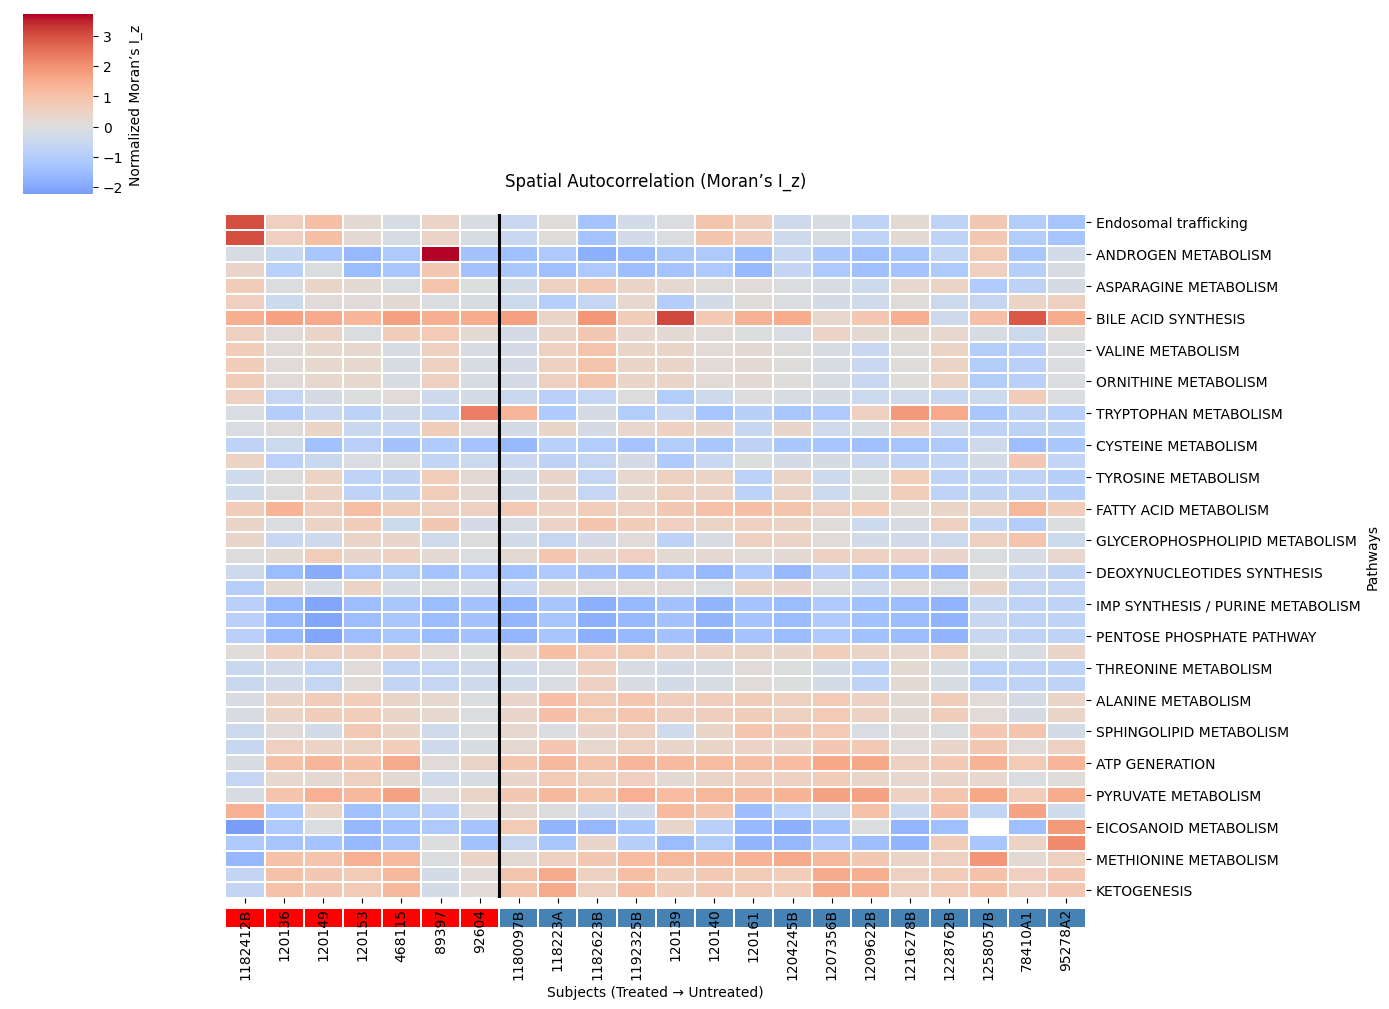

In [22]:
heat_df = (
    moran_df.groupby(["Pathway", "Subject_ID", "Treatment_Status"])["I_z"]
    .mean()
    .reset_index()
)

heat_pivot = heat_df.pivot_table(
    index="Pathway",
    columns=["Treatment_Status", "Subject_ID"],
    values="I_z"
)

ordered_pathways = task_stats.sort_values("Delta_Iz", ascending=False).index
heat_pivot = heat_pivot.loc[ordered_pathways]

treated_cols = [col for col in heat_pivot.columns if col[0] == "Treated"]
untreated_cols = [col for col in heat_pivot.columns if col[0] == "Untreated"]
heat_pivot = pd.concat([heat_pivot[treated_cols], heat_pivot[untreated_cols]], axis=1)

treatment_labels = ["Treated"] * len(treated_cols) + ["Untreated"] * len(untreated_cols)
palette = {"Treated": "red", "Untreated": "steelblue"}
col_colors = pd.Series(treatment_labels, index=heat_pivot.columns).map(palette)

new_labels = [col[1] for col in list(heat_pivot.columns)]
heat_pivot.columns = new_labels

g = sns.clustermap(
    heat_pivot,
    cmap="coolwarm",
    center=0,
    col_colors=[col_colors],
    col_cluster=False,
    row_cluster=False,
    linewidths=0.3,
    figsize=(14, 10),
    cbar_kws={"label": "Normalized Moran’s I_z"},
)

col_colors_ax = g.ax_col_colors
heatmap_ax = g.ax_heatmap
col_colors_ax.set_position([
    heatmap_ax.get_position().x0,
    heatmap_ax.get_position().y0 - 0.03,
    heatmap_ax.get_position().width,
    0.02
])

treated_count = len(treated_cols)
g.ax_heatmap.axvline(
    treated_count,
    color="black",
    lw=2.2,
    linestyle="-"
)

if g.ax_col_dendrogram.get_legend():
    g.ax_col_dendrogram.get_legend().remove()

g.ax_heatmap.set_xlabel("Subjects (Treated → Untreated)")
g.ax_heatmap.set_ylabel("Pathways")
g.ax_heatmap.set_title("Spatial Autocorrelation (Moran’s I_z)", pad=20)

plt.show()


### Task Level Spatial Moran's I Analysis

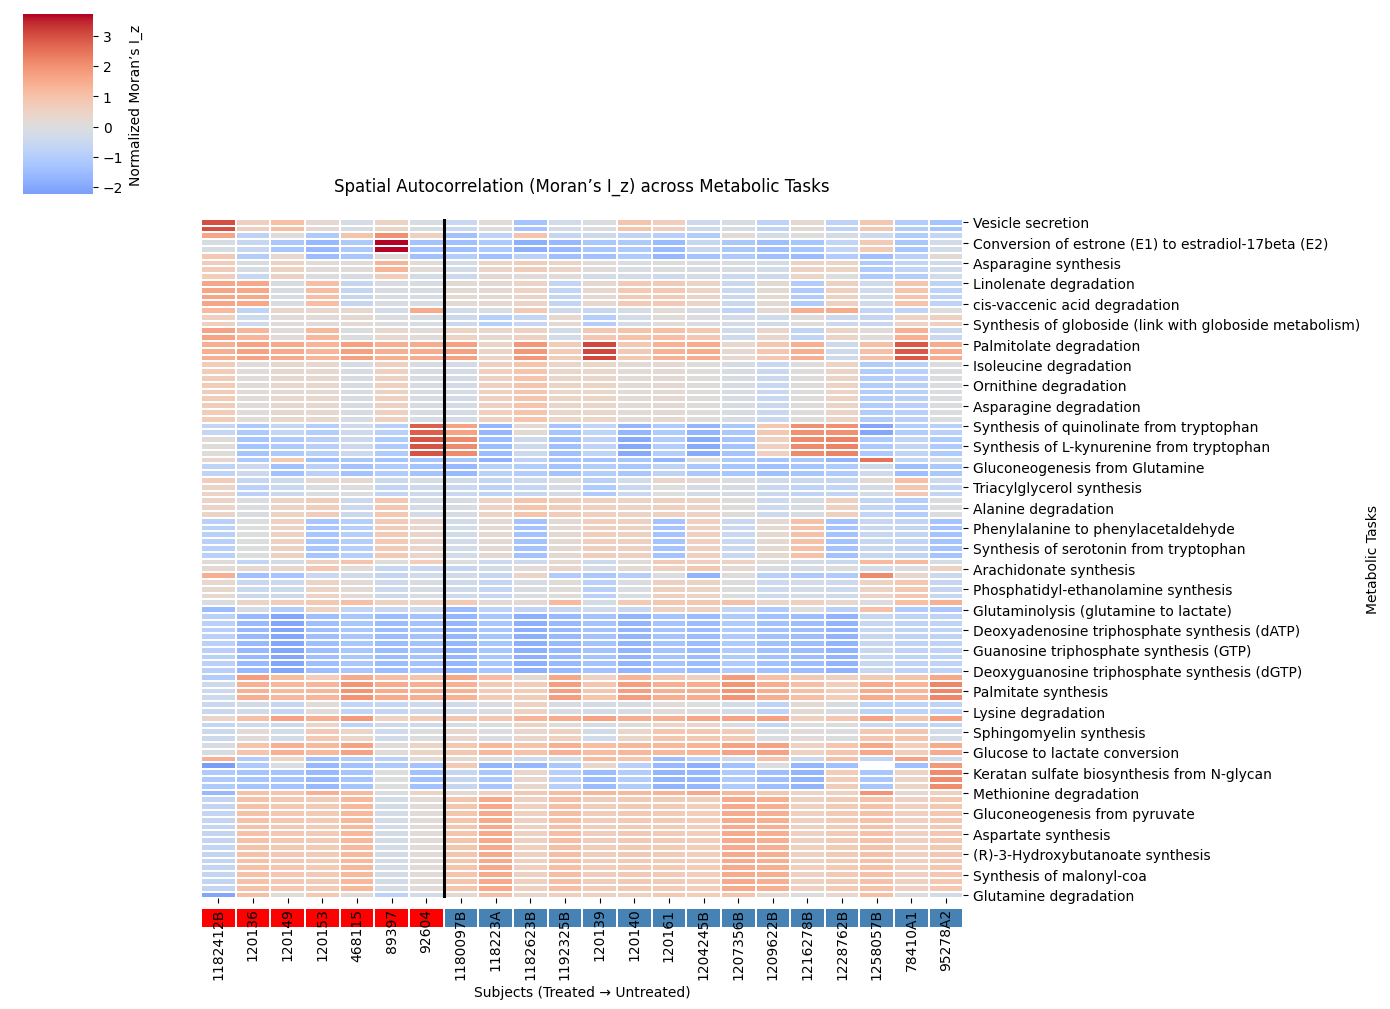

In [23]:
heat_df = (
    moran_df.groupby(["Task", "Subject_ID", "Treatment_Status"])["I_z"]
    .mean()
    .reset_index()
)

task_order = (
    heat_df.groupby(["Task", "Treatment_Status"])["I_z"]
    .mean()
    .unstack()
)
task_order["Delta_Iz"] = task_order["Treated"] - task_order["Untreated"]
ordered_tasks = task_order.sort_values("Delta_Iz", ascending=False).index

heat_pivot = heat_df.pivot_table(
    index="Task",
    columns=["Treatment_Status", "Subject_ID"],
    values="I_z"
)

heat_pivot = heat_pivot.loc[ordered_tasks.intersection(heat_pivot.index)]

treated_cols = [col for col in heat_pivot.columns if col[0] == "Treated"]
untreated_cols = [col for col in heat_pivot.columns if col[0] == "Untreated"]
heat_pivot = pd.concat([heat_pivot[treated_cols], heat_pivot[untreated_cols]], axis=1)

treatment_labels = ["Treated"] * len(treated_cols) + ["Untreated"] * len(untreated_cols)
palette = {"Treated": "red", "Untreated": "steelblue"}
col_colors = pd.Series(treatment_labels, index=heat_pivot.columns).map(palette)

new_labels = [col[1] for col in list(heat_pivot.columns)]
heat_pivot.columns = new_labels

g = sns.clustermap(
    heat_pivot,
    cmap="coolwarm",
    center=0,
    col_colors=[col_colors],
    col_cluster=False,
    row_cluster=False,
    linewidths=0.3,
    figsize=(14, 10),
    cbar_kws={"label": "Normalized Moran’s I_z"},
)

col_colors_ax = g.ax_col_colors
heatmap_ax = g.ax_heatmap
col_colors_ax.set_position([
    heatmap_ax.get_position().x0,
    heatmap_ax.get_position().y0 - 0.03,
    heatmap_ax.get_position().width,
    0.02
])

treated_count = len(treated_cols)
g.ax_heatmap.axvline(
    treated_count,
    color="black",
    lw=2.2,
    linestyle="-"
)

g.ax_heatmap.set_xlabel("Subjects (Treated → Untreated)")
g.ax_heatmap.set_ylabel("Metabolic Tasks")
g.ax_heatmap.set_title("Spatial Autocorrelation (Moran’s I_z) across Metabolic Tasks", pad=20)

plt.show()
